# <center>Network Science</center>

Home Assignment #3: Epidemic Models

#### <hr /> General Information

**Due Date:** 11.06.2020 21:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_3*

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1. Epidemic modelling

Use any existing network from our [classes](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1)  or your couse project

1.1. Using Seminar examples or [ndlib](https://ndlib.readthedocs.io/en/latest/reference/reference.html) implement one of the possible models (SI, SIS, SIR, SEIR, SEIS, SWIR, Threshold, Generalised Threshold, Kertesz Threshold, Independent Cascades) to model epidemics in given network<br>


In [1]:
!pip install ndlib
!pip install bokeh

In [2]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.bokeh.MultiPlot import MultiPlot

from bokeh.io import output_notebook,show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

import warnings; warnings.simplefilter('ignore')


# SIS Model

In [4]:
#SIS Model
vm=MultiPlot()

df=pd.read_csv('facebook_filtered.csv')

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

model=ep.SISModel(G)
config=mc.Configuration()
# Different nodes has been used from example
infected_nodes=[2434718420168100, 576107381213464, 1237455386316168, 1076908975697777, 295109381292, 340132236082973]

config.add_model_parameter("beta",0.05)
config.add_model_parameter("lambda",0.01)
config.add_model_parameter("fraction_infected",0.05)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 65.75it/s]

{'beta': 0.05, 'lambda': 0.01, 'fraction_infected': 0.05, 'tp_rate': 1}


Loading BokehJS ...

Growth of infection and depletion of the susceptible population in an SIS outbreak

# SIR Model

In [4]:
#SIR Model
vm=MultiPlot()

df=pd.read_csv('facebook_filtered.csv')

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

model=ep.SIRModel(G)
config=mc.Configuration()

infected_nodes=[2434718420168100, 576107381213464, 1237455386316168, 1076908975697777, 295109381292, 340132236082973]


config.add_model_parameter("beta",0.5)
config.add_model_parameter("gamma",0.1)
config.add_model_parameter("fraction_infected",1)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 125.57it/s]

{'beta': 0.5, 'gamma': 0.1, 'fraction_infected': 1, 'tp_rate': 1}


Loading BokehJS ...

Growth of infection and depletion of the susceptible population in an SIR outbreak

# IC

In [5]:
#IC Model
vm=MultiPlot()

df=pd.read_csv('facebook_filtered.csv')

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

IDCS=ep.IndependentCascadesModel(G)
config=mc.Configuration()
#supply the top 10 infected nodes of all 3 centralities 1 by 1 
infected_nodes=[2434718420168100, 576107381213464, 1237455386316168, 1076908975697777, 295109381292, 340132236082973]


config.add_model_initial_configuration("Infected",infected_nodes)

for e in G.edges():
    config.add_edge_configuration("threshold",e,0.5)
  
IDCS.set_initial_status(config)
iterations=IDCS.iteration_bunch(10)
print(IDCS.get_info())

trends=IDCS.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(IDCS,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 615.27it/s]

{}


Loading BokehJS ...

Growth of infection and depletion of the susceptible population in an IC outbreak

### Task 2. Bonus Task
**+10 points:** Using gradient optimization fit Infection or Recovery curve to the [observed data](https://yastat.net/s3/milab/2020/covid19-stat/data/data_struct_12.json?v=1590678089)

In [9]:
import urllib.request, json 
russia_data = []
with urllib.request.urlopen("https://yastat.net/s3/milab/2020/covid19-stat/data/data_struct_12.json?v=1590678089") as url:
    data = json.loads(url.read().decode())
    russia_data = data["russia_stat_struct"]["data"]["225"]["cases"]

russia_case = [item["v"] for idx,item in enumerate(russia_data)]
russia_day = range(len(russia_case))

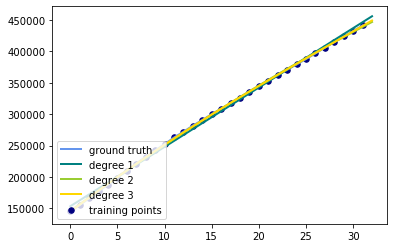

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, len(russia_day), 100)

# generate points and keep a subset of them
x = np.array(russia_day)
y = np.array(russia_case)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]



colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(russia_day, russia_case, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([1, 2, 3]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [27]:
type(X)

numpy.ndarray

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid={'polynomialfeatures__degree':np.arange(7)}
grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7,scoring='neg_mean_squared_error')
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6])},
             pre_dispat

In [38]:
print(grid.cv_results_)
print(grid.best_params_)

{'mean_fit_time': array([0.00242618, 0.00285629, 0.00071417, 0.00071062, 0.00100565,
       0.00043055, 0.00071488]), 'std_fit_time': array([0.00433697, 0.00619736, 0.00045168, 0.0004495 , 0.00092601,
       0.00049716, 0.00045215]), 'mean_score_time': array([0.00085698, 0.00057275, 0.00028457, 0.00057142, 0.00042857,
       0.00057132, 0.00042142]), 'std_score_time': array([0.00098931, 0.00049602, 0.00044995, 0.00049487, 0.00049488,
       0.00049479, 0.00048673]), 'param_polynomialfeatures__degree': masked_array(data=[0, 1, 2, 3, 4, 5, 6],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'polynomialfeatures__degree': 0}, {'polynomialfeatures__degree': 1}, {'polynomialfeatures__degree': 2}, {'polynomialfeatures__degree': 3}, {'polynomialfeatures__degree': 4}, {'polynomialfeatures__degree': 5}, {'polynomialfeatures__degree': 6}], 'split0_test_score': array([-2.52840098e+10, -1.43453867e+08, -1.60458154e+0